In [ ]:
import csv
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import pandas as pd
from scipy import stats


drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/EECS4412/215632375-216263949-216374324-T2Mod.csv')
data = data.iloc[: , 1:]
label = pd.read_csv('/content/drive/MyDrive/EECS4412/215632375-216263949-216374324-T2Class.csv')
label = label.iloc[: , 1:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics


def classification(train_index, test_index, i):
  print('{} of {}-fold'.format(i,kf.n_splits))
  X_train = X.iloc[train_index]
  X_test = X.iloc[test_index] 
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]
  model = GaussianNB()
  model.fit(X_train, y_train)
  pred = model.predict(X_test)

  # get TP, TN, FP, FN
  matrix = metrics.confusion_matrix(y_test, pred)
  FP = matrix.sum(axis=0) - np.diag(matrix)
  FN = matrix.sum(axis=1) - np.diag(matrix)
  TP = np.diag(matrix)
  TN = matrix.sum() - (FP + FN + TP)
  
  # Multiclass acc, recall, precision, f measure
  ACC = (TP+TN)/(TP+FP+FN+TN)
  RECALL = TP/(TP+FN)
  PRE = TP/(TP+FP)
  F_MEASURE = (2*TP)/(2*TP+FN+FP)
  
  nppp = np.asarray([ACC, RECALL, PRE, F_MEASURE])
  result = pd.DataFrame(nppp).T
  result.columns = ['accuracy','recall','precision','f-measure']
  print(result)

  pred_prob = model.predict_proba(X_test)
  # plot the ROC graph 
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(5):
    fpr[i], tpr[i], roc_auc[i] = metrics.roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
  plt.figure(figsize=(7,5))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
  plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=200);  
  


# using KFold in sklearn to get 3 folds
kf = KFold(n_splits=3, shuffle=True)

# dividing X, y into train and test data
X = data
y = label

1 of 3-fold
   accuracy    recall  precision  f-measure
0  0.970060  0.944444   0.944444   0.944444
1  0.970060  0.892857   0.986842   0.937500
2  0.994012  0.962963   0.962963   0.962963
3  0.997006  0.888889   1.000000   0.941176
4  0.955090  0.975806   0.909774   0.941634


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


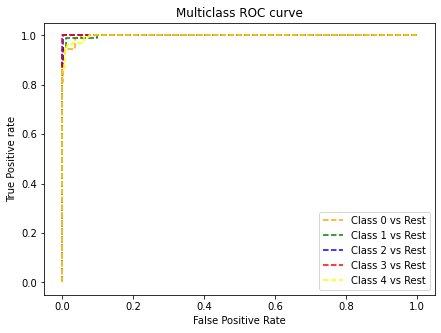

In [ ]:
# the first fold
train_index_1, test_index_1 = next(kf.split(X, y))

classification(train_index_1, test_index_1, 1)

2 of 3-fold
   accuracy    recall  precision  f-measure
0  0.970060  0.925926   0.949367   0.937500
1  0.958084  0.849462   1.000000   0.918605
2  0.991018  0.961538   0.925926   0.943396
3  0.997006  1.000000   0.833333   0.909091
4  0.958084  1.000000   0.902098   0.948529


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


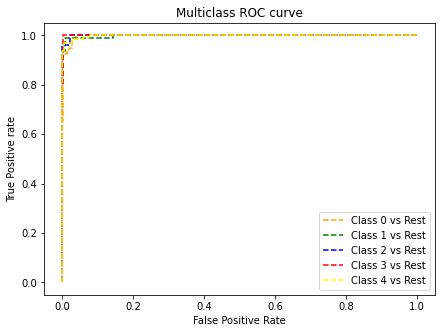

In [ ]:
# the second fold
train_index_2, test_index_2 = next(kf.split(X, y))

classification(train_index_2, test_index_2, 2)

3 of 3-fold
   accuracy    recall  precision  f-measure
0  0.973054  0.977273   0.924731   0.950276
1  0.967066  0.851351   1.000000   0.919708
2  0.991018  0.968750   0.939394   0.953846
3  0.997006  1.000000   0.833333   0.909091
4  0.976048  0.985185   0.956835   0.970803


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


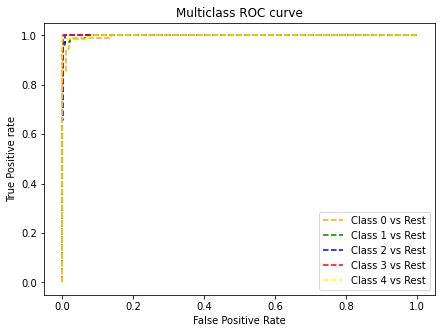

In [ ]:
# the third fold
train_index_3, test_index_3 = next(kf.split(X, y))

classification(train_index_3, test_index_3, 3)